# Bike Sharing Assignment

#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Step 1: Data Understanding

In [2]:
# Reading the dataset 
bike = pd.read_csv("./day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the shape of dataset
bike.shape

(730, 16)

In [4]:
# Checking the info, to now type of columns and non-null count
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### The dataset has no null values and 730 rows and 16 columns

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking null values to make sure
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# checking for duplicate rows
bike.duplicated().sum()

0

In [8]:
# checking number of unique values
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Step 2: Data Cleaning

There appears to be an inconsistency in the 'weekday' column. For instance, the date '01-01-2018' is a Monday (the first day of the week), but the 'weekday' column lists it as '6' (which typically corresponds to Saturday). To address this, we can drop the 'weekday' column and create a new column for the day of the week using the 'pd.to_datetime' function on the 'dteday' column.

In [9]:
bike['dteday']= pd.to_datetime(bike['dteday'], format='%d-%m-%Y')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# storing the new weekday which is extraced from above to 'new_weekday'
bike['new_weekday'] = bike['dteday'].dt.dayofweek
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,new_weekday
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


Since we've extracted the day of the week into the 'new_weekday' column, the 'weekday' column is no longer necessary. Additionally, the 'dteday' column can also be dropped as its information is now captured in 'new_weekday','mnth','yr'.

In [11]:
bike = bike.drop(columns=['dteday', 'weekday'],axis=1)
bike.head()

,instant,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,new_weekday
0,1,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,1,0,1,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


We can remove the following columns:
- 'instant': This column likely serves as an index and doesn't hold information directly relevant to predicting our target variable 'cnt'.
- 'casual' and 'registered': Since their sum is already stored in the 'cnt' column, keeping them becomes redundant

In [12]:
bike = bike.drop(columns=['instant', 'casual', 'registered'], axis=1)

In [13]:
bike.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,new_weekday
0,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [14]:
# Mapping numerical categorical variables 'season', 'mnth', 'weathersit', 'new_weekday' to their values
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bike.season = bike.season.map(season_mapping)

mnth_mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept', 10:'Oct',11:'Nov',12:'Dec'}
bike.mnth = bike.mnth.map(mnth_mapping)

weathersit_mapping = {1:"clear & partlycloudy",2:'Mist & Cloudy',3:'Light Snow & Thunderstorm',4:'Heavy Rain & Ice Pallets'}
bike.weathersit = bike.weathersit.map(weathersit_mapping)

new_weekday_mapping = {0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}
bike.new_weekday = bike.new_weekday.map(new_weekday_mapping)

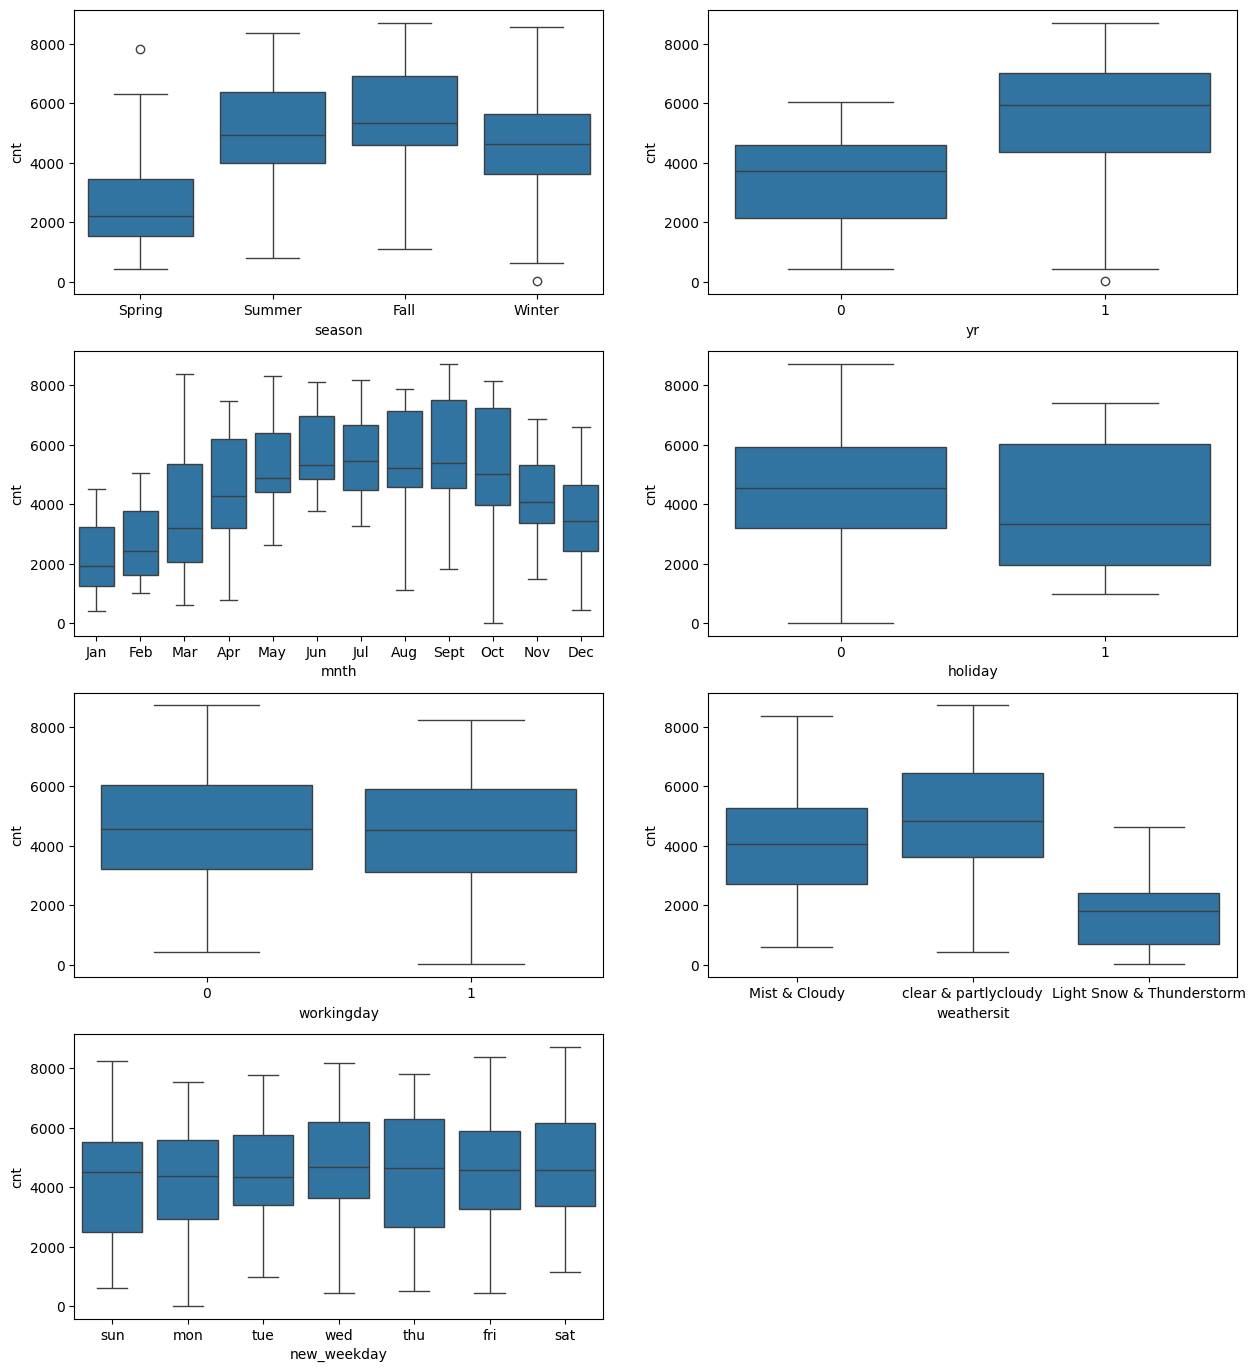

In [15]:
# checking for outliers
plt.figure(figsize=(15,17))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'new_weekday', y = 'cnt', data = bike)
plt.show()

In [16]:
bike.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,new_weekday
0,Spring,0,Jan,0,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985,sun
1,Spring,0,Jan,0,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801,mon
2,Spring,0,Jan,0,1,clear & partlycloudy,8.050924,9.47025,43.7273,16.636703,1349,tue
3,Spring,0,Jan,0,1,clear & partlycloudy,8.200000,10.60610,59.0435,10.739832,1562,wed
4,Spring,0,Jan,0,1,clear & partlycloudy,9.305237,11.46350,43.6957,12.522300,1600,thu


### Step 3: Bivariate Analysis

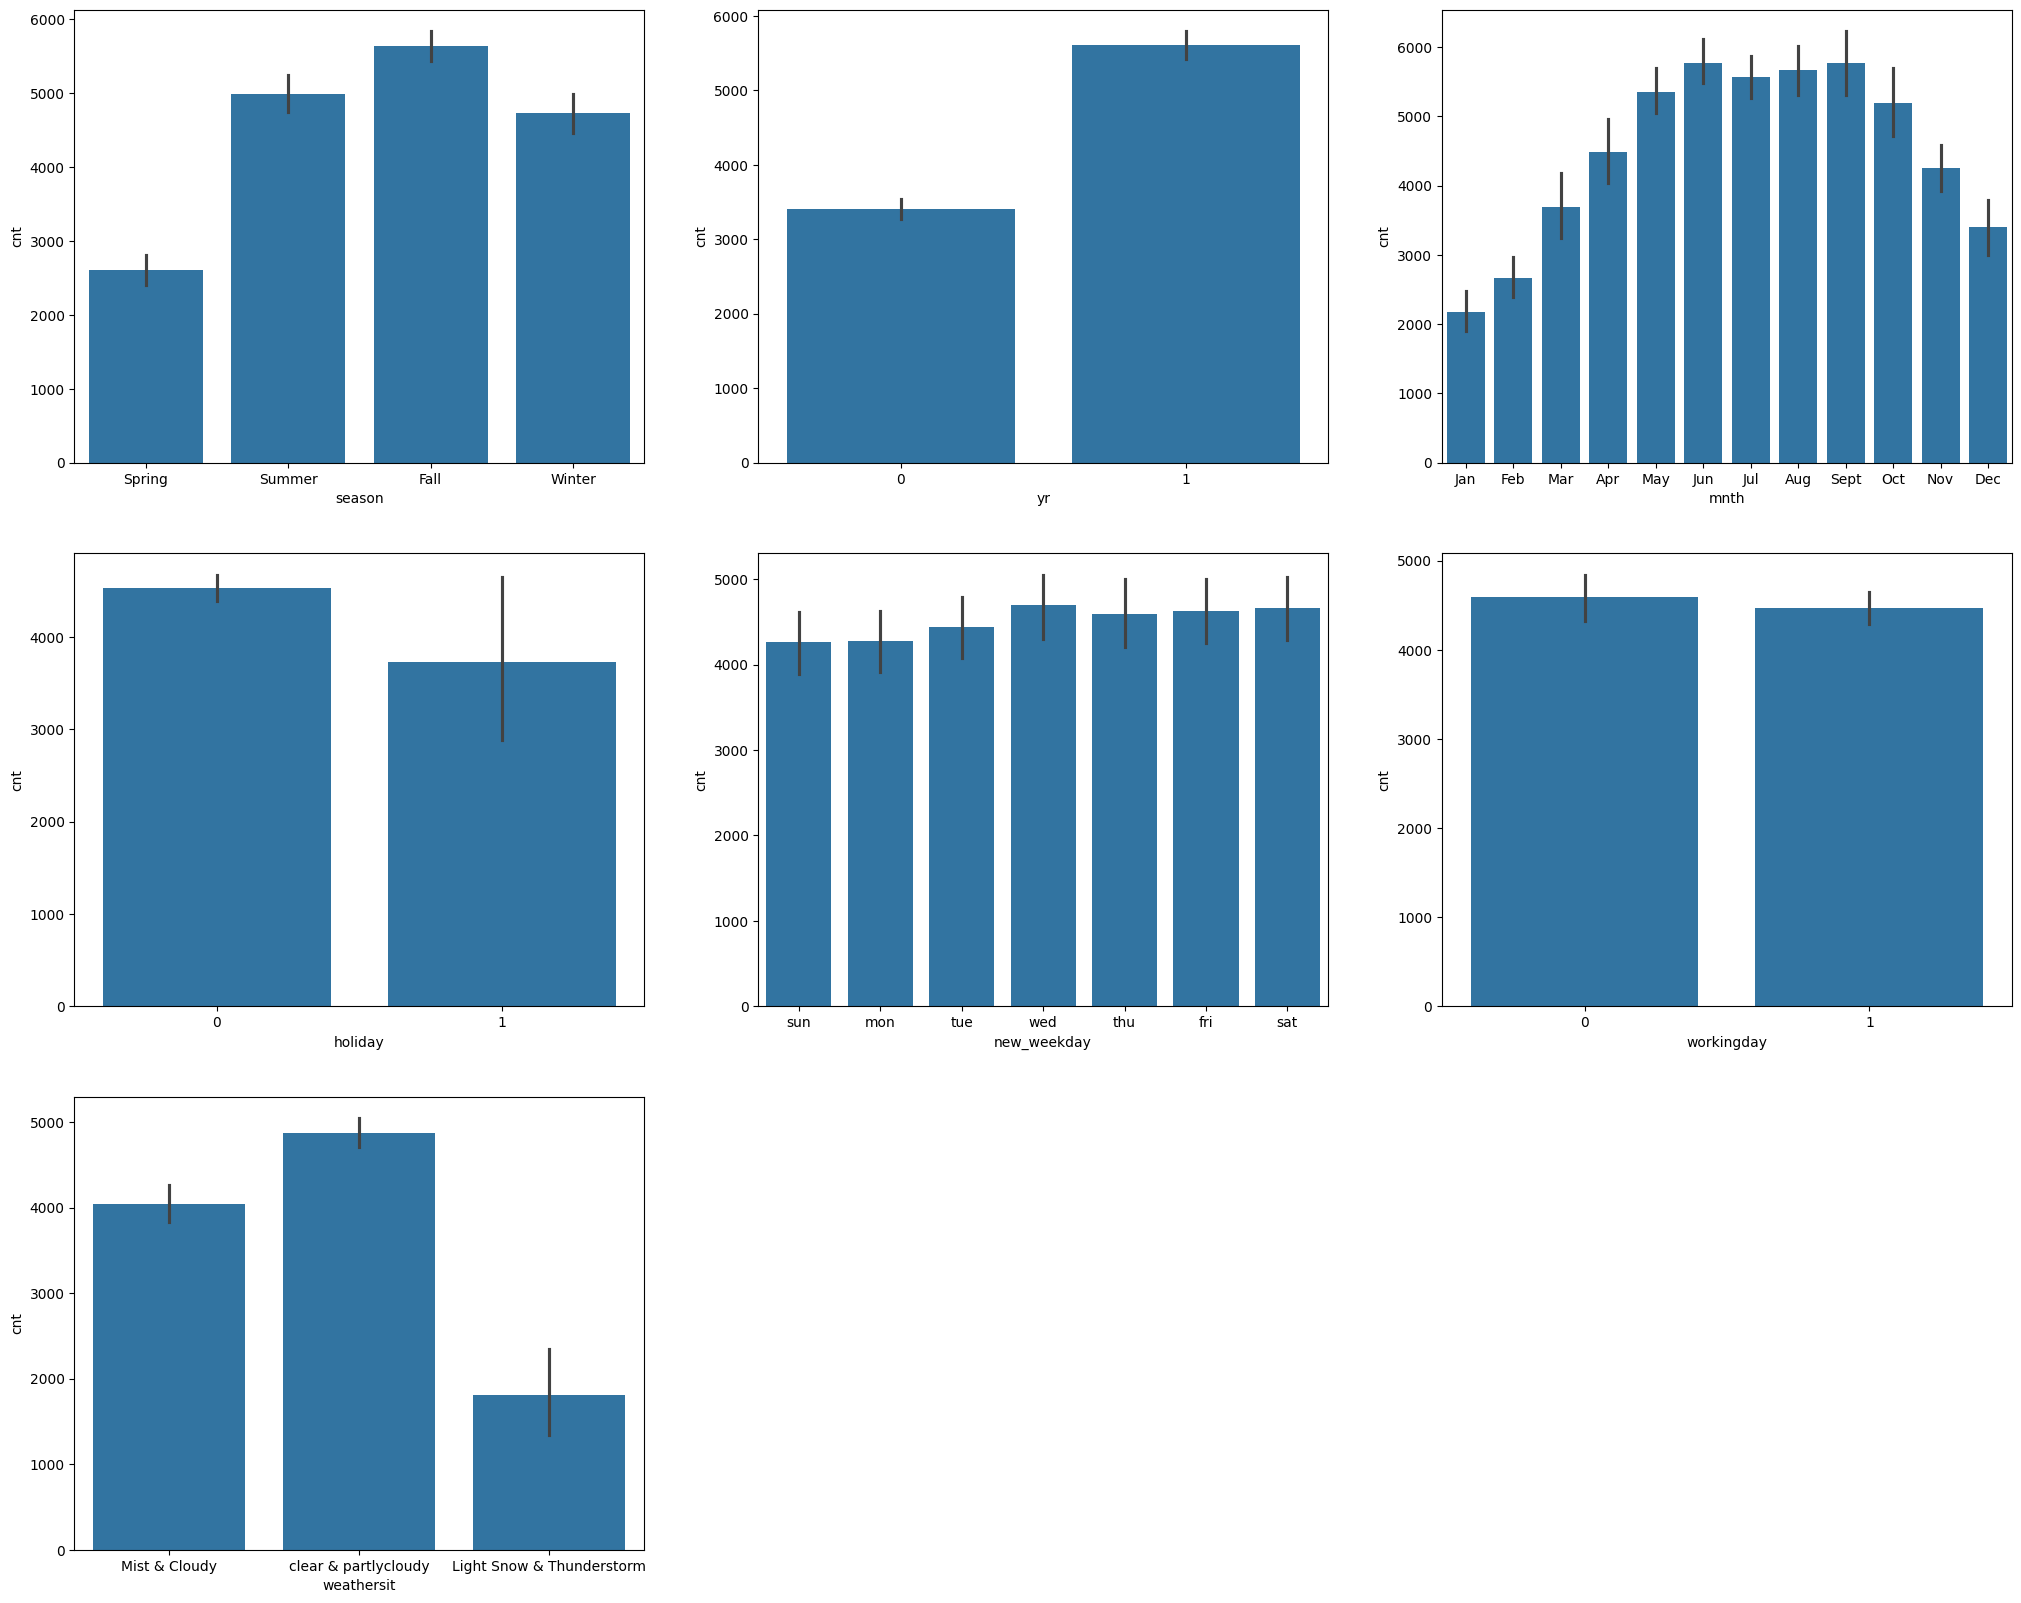

In [17]:
# plotting bar plot between cnt and categorical variables
cols = ['season','yr','mnth','holiday','new_weekday','workingday','weathersit']
plt.figure(figsize=(25, 20))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.barplot(data=bike, x=cols[i], y='cnt')

Analysis of Bike Usage:

- Seasonality: Fall is the peak season for ridership, while spring sees the least activity.
- Yearly Trend: Bike usage increased in 2019 compared to the previous year.
- Monthly Trend: Bookings peak in the summer months (May-October), suggesting a preference for warmer weather.
- Holidays: Ridership is generally higher on non-holidays.
- Day of the Week: Sundays have the fewest riders, with usage increasing towards midweek before dipping slightly and rising again. This suggests a potential work commute influence.
- Working Day: Interestingly, the number of bookings seems fairly consistent between weekdays and non-weekdays.
- Weather: Clear and partly cloudy weather conditions see the most riders, potentially due to preferable weather conditions.

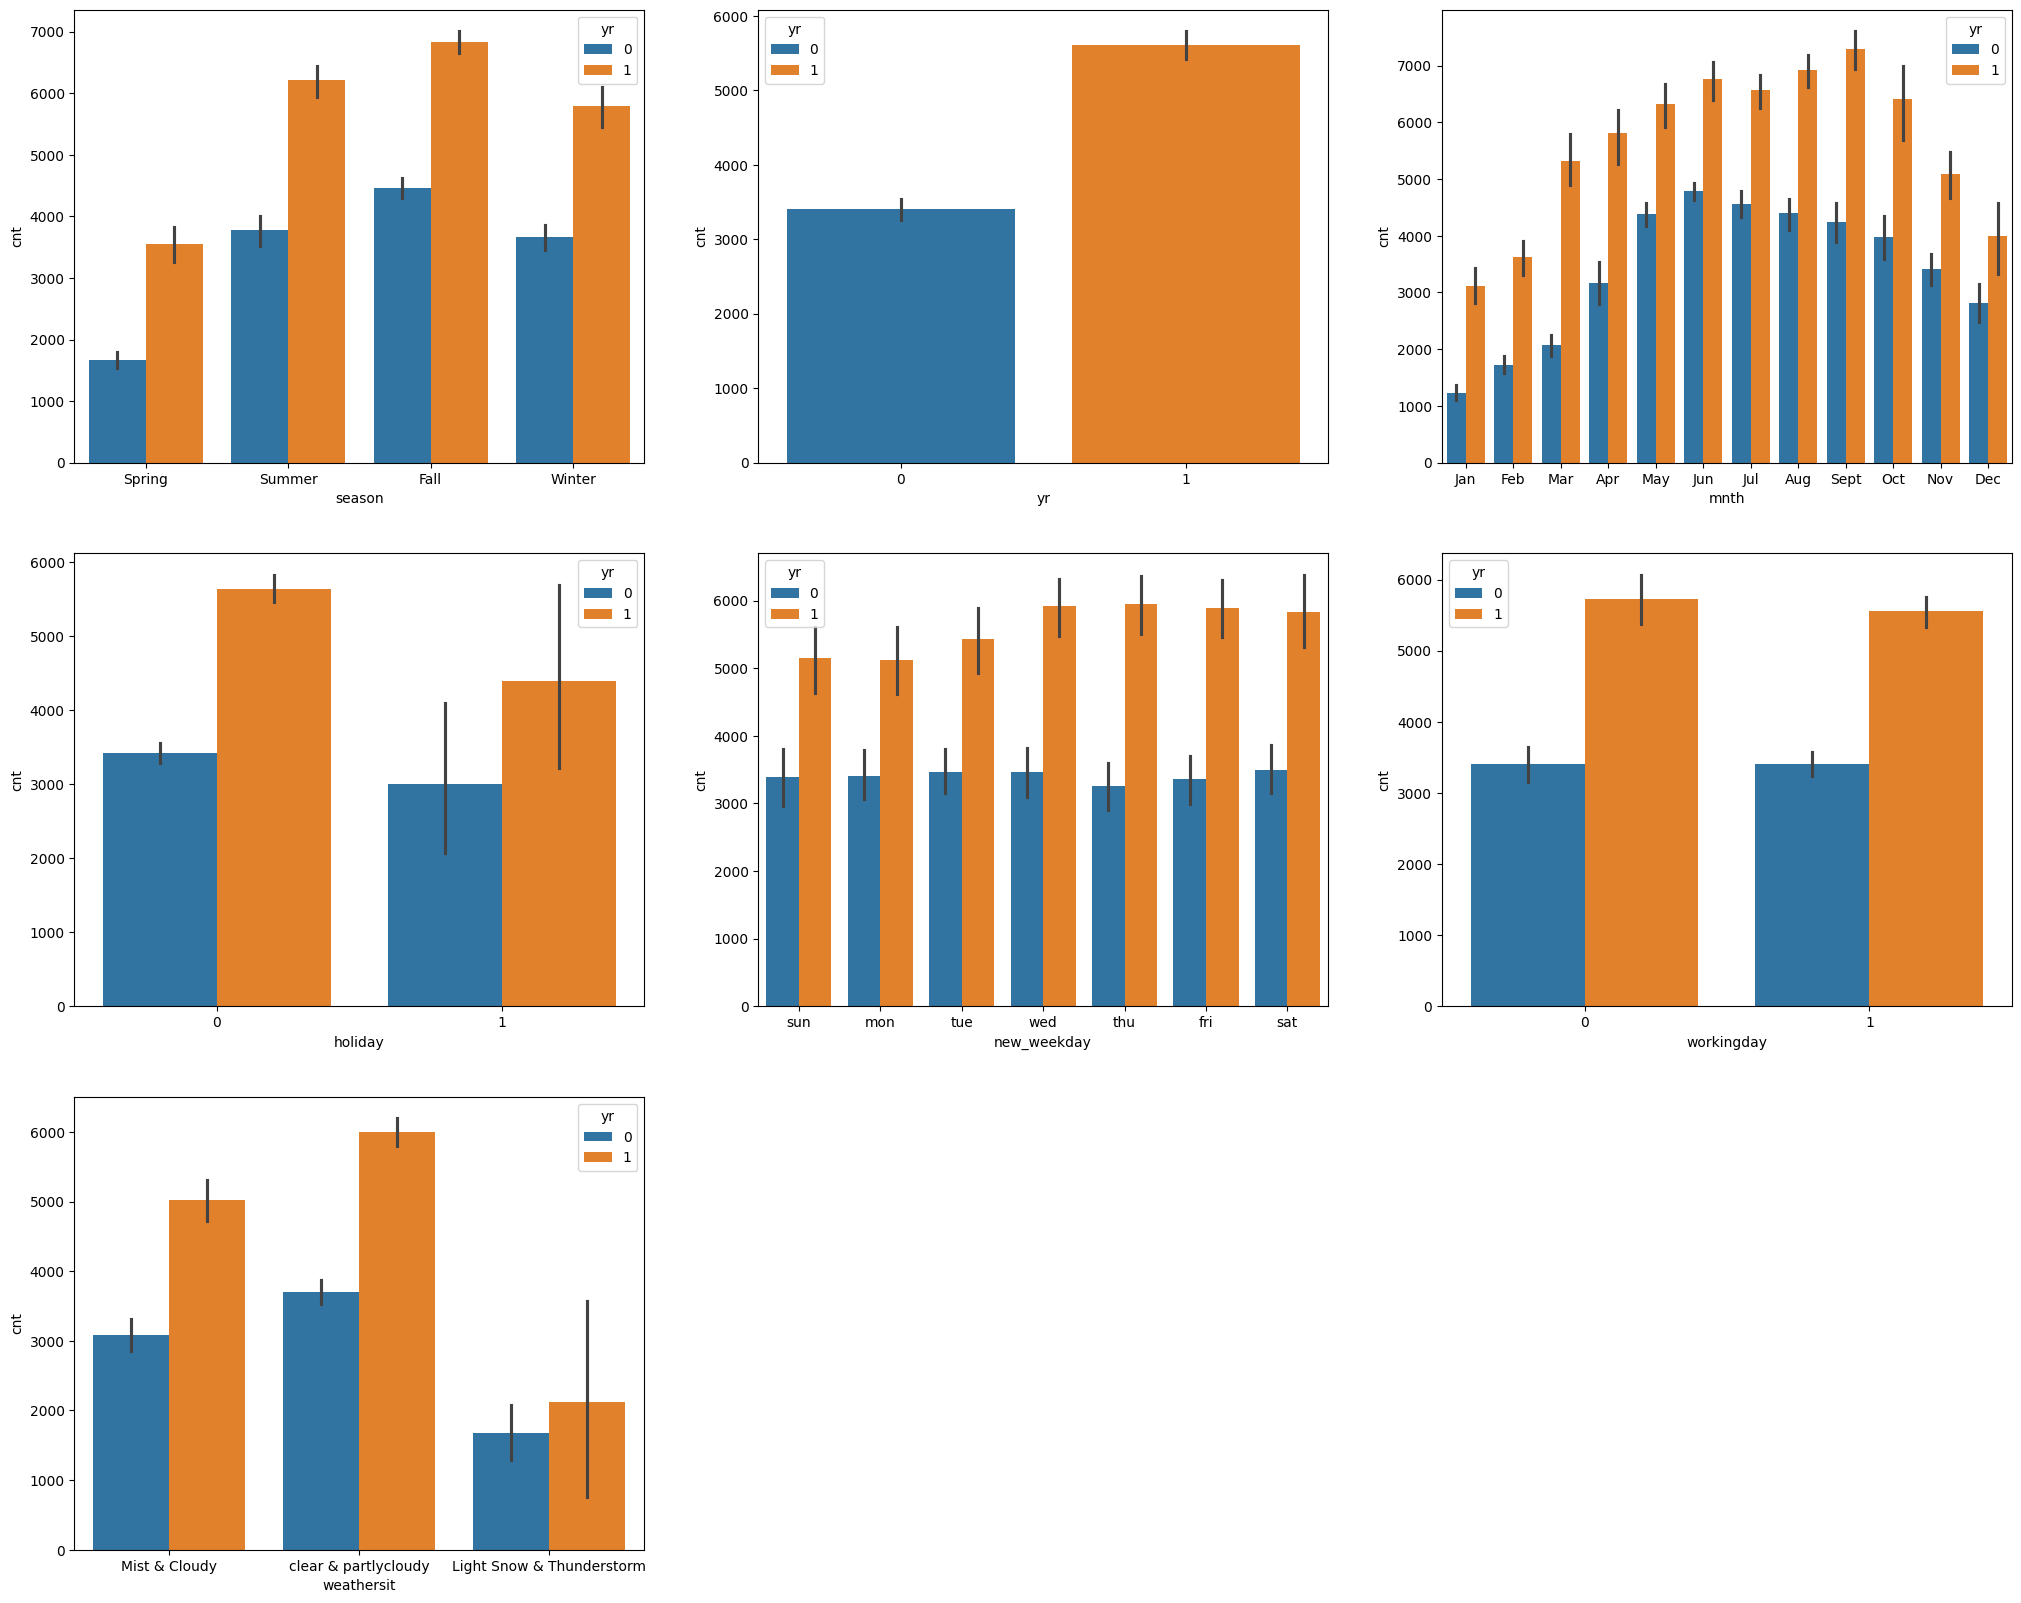

In [18]:
# plotting bar chart between categorical variable and 'cnt' with hue as yr
plt.figure(figsize=(25, 20))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    sns.barplot(data=bike, x=cols[i], y='cnt', hue='yr')

Bike usage increased year-over-year, independent of the variable we're trying to predict.

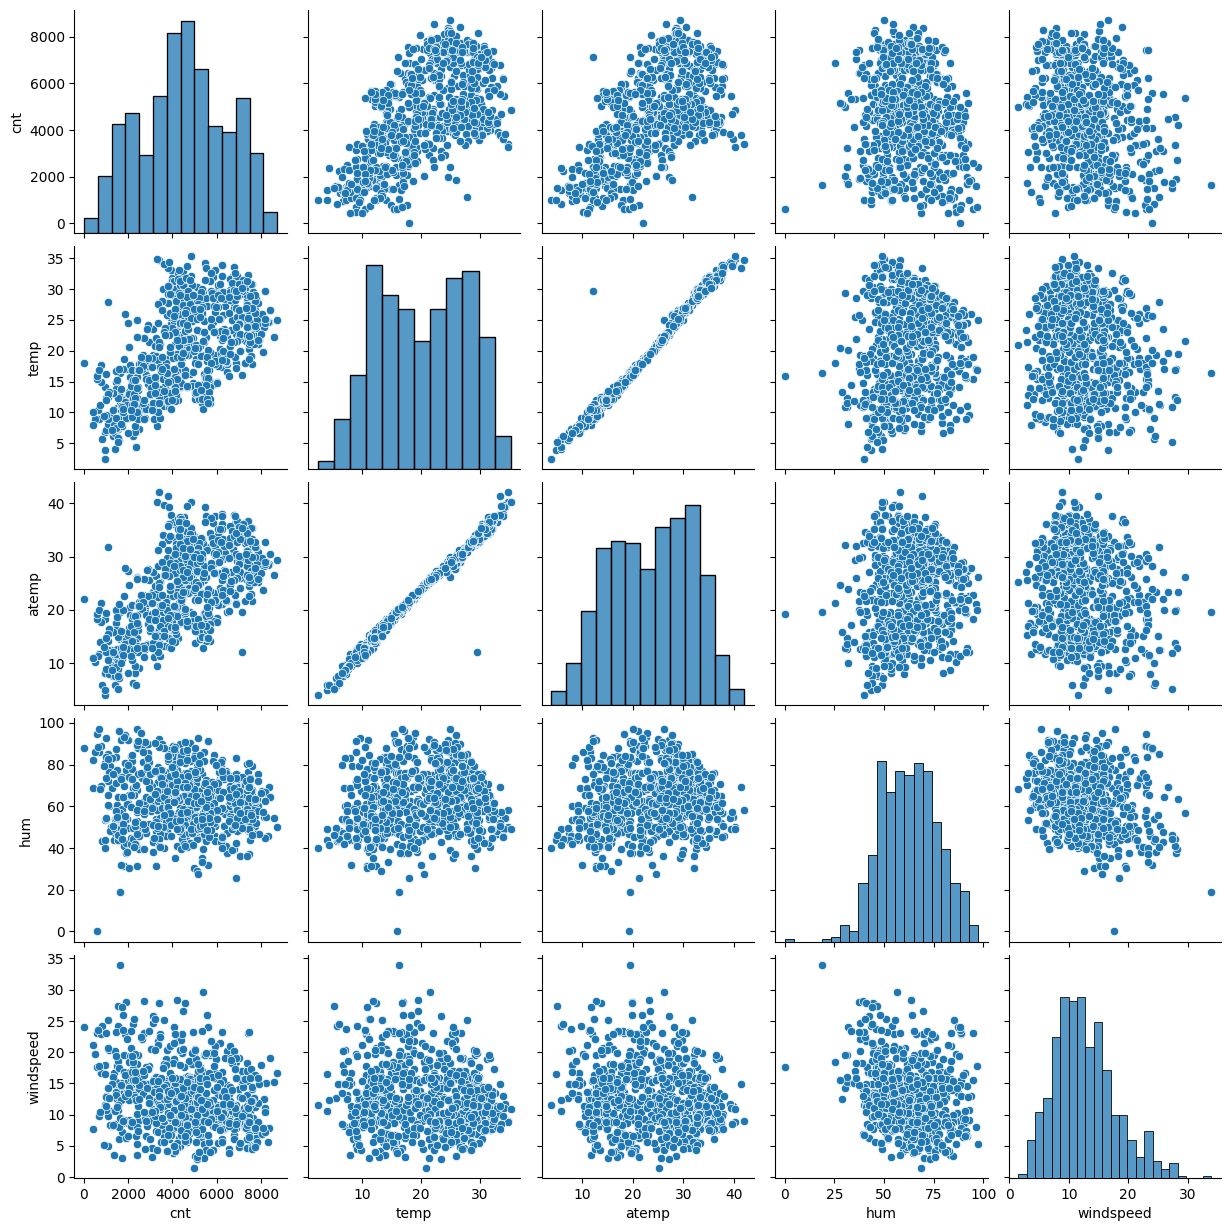

In [19]:
# creating a pairplot between the numerical variables
sns.pairplot(bike[['cnt','temp','atemp','hum','windspeed']])
plt.show()

‘temp' and 'atemp' variables have the highest correlation with the target variable(cnt)

In [20]:
bike_numeric_cols = bike.select_dtypes(include=[int, float])
bike_numeric_cols.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


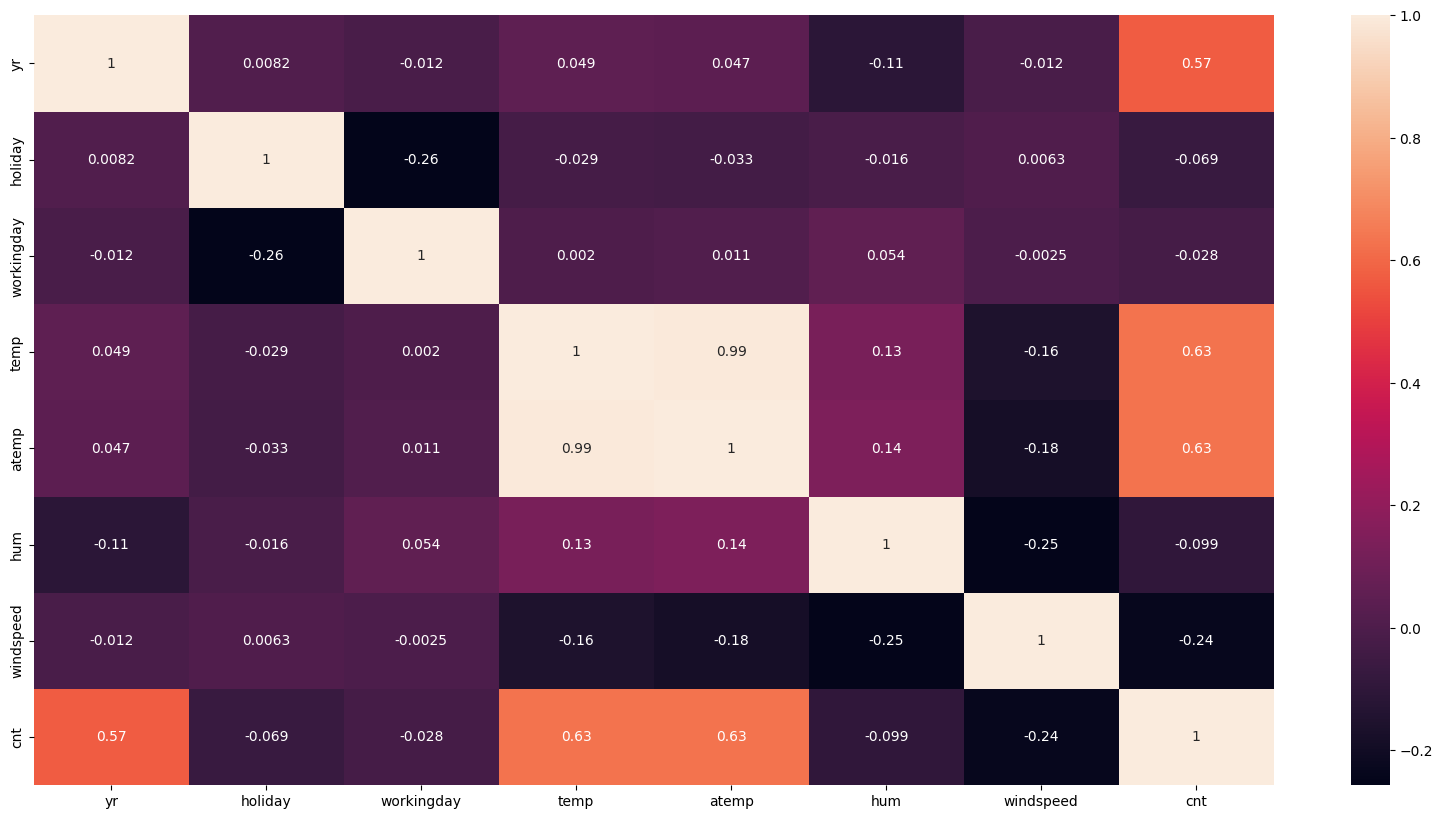

In [21]:
# plotting heatmap for dataframe.
plt.figure(figsize=(20,10))
sns.heatmap(bike_numeric_cols.corr(),annot=True)
plt.show()

Strong correlation between 'temp' & 'atemp' suggests using RFE, while 'cnt' correlates positively with 'temp' & 'atemp' but negatively with 'windspeed' & 'hum'. We'll use scatter reg-plots to explore these further.

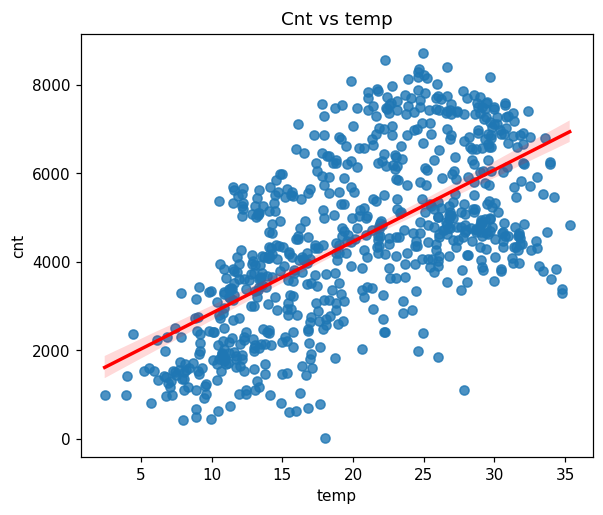

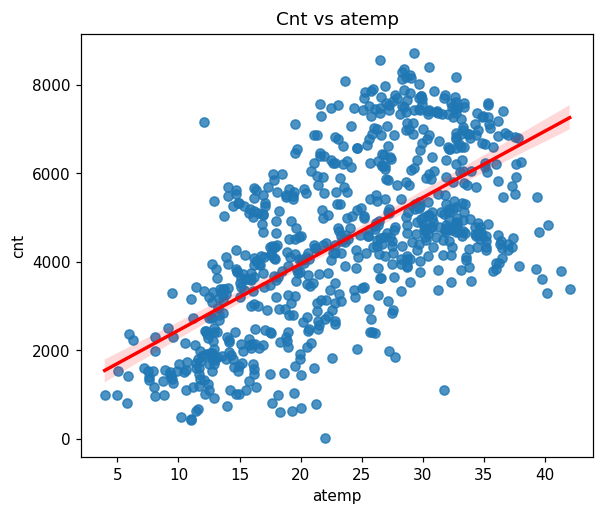

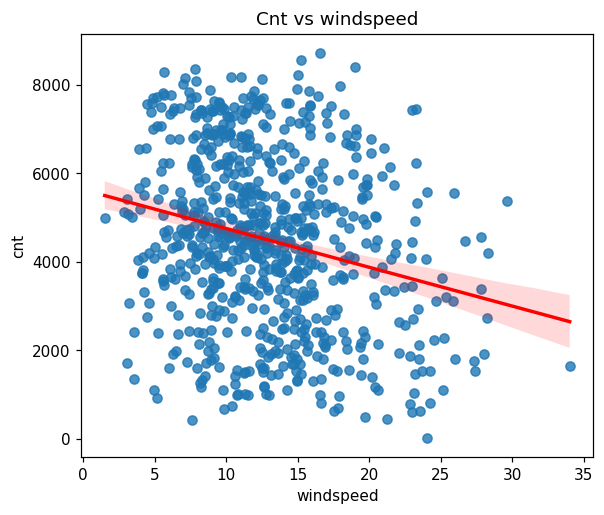

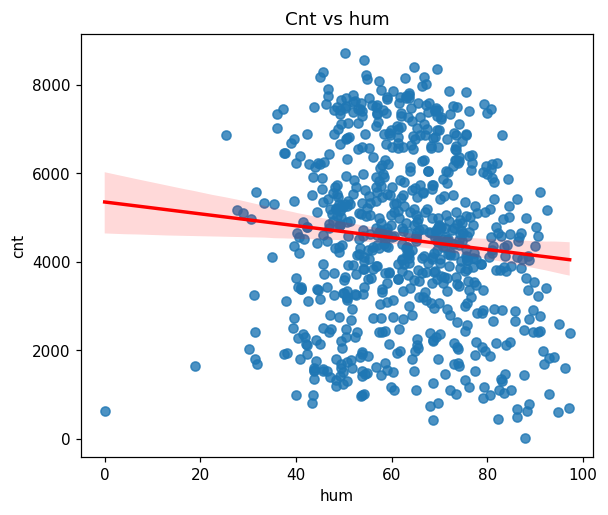

In [22]:
# Checking with scatter reg-plot the correlation of cnt with 'temp', 'atemp', 'windspeed', 'hum'
corr_cols = ['temp', 'atemp','windspeed', 'hum']
for i in corr_cols:
    plt.figure(figsize=(6,5),dpi=110)
    plt.title(f"Cnt vs {i}",fontsize=12)
    sns.regplot(data=bike,y="cnt",x=i,line_kws={"color": "red"})
    plt.xlabel(i)
    plt.show()

### Step 4: Data Preparation

In [23]:
# Creating Dummy Variables
bike = pd.get_dummies(bike,drop_first = True)

In [24]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weathersit_Mist & Cloudy,weathersit_clear & partlycloudy,new_weekday_mon,new_weekday_sat,new_weekday_sun,new_weekday_thu,new_weekday_tue,new_weekday_wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,1,0,0


In [25]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weathersit_Mist & Cloudy', 'weathersit_clear & partlycloudy',
       'new_weekday_mon', 'new_weekday_sat', 'new_weekday_sun',
       'new_weekday_thu', 'new_weekday_tue', 'new_weekday_wed'],
      dtype='object')

In [26]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   yr                               730 non-null    int64  
 1   holiday                          730 non-null    int64  
 2   workingday                       730 non-null    int64  
 3   temp                             730 non-null    float64
 4   atemp                            730 non-null    float64
 5   hum                              730 non-null    float64
 6   windspeed                        730 non-null    float64
 7   cnt                              730 non-null    int64  
 8   season_Spring                    730 non-null    uint8  
 9   season_Summer                    730 non-null    uint8  
 10  season_Winter                    730 non-null    uint8  
 11  mnth_Aug                         730 non-null    uint8  
 12  mnth_Dec              

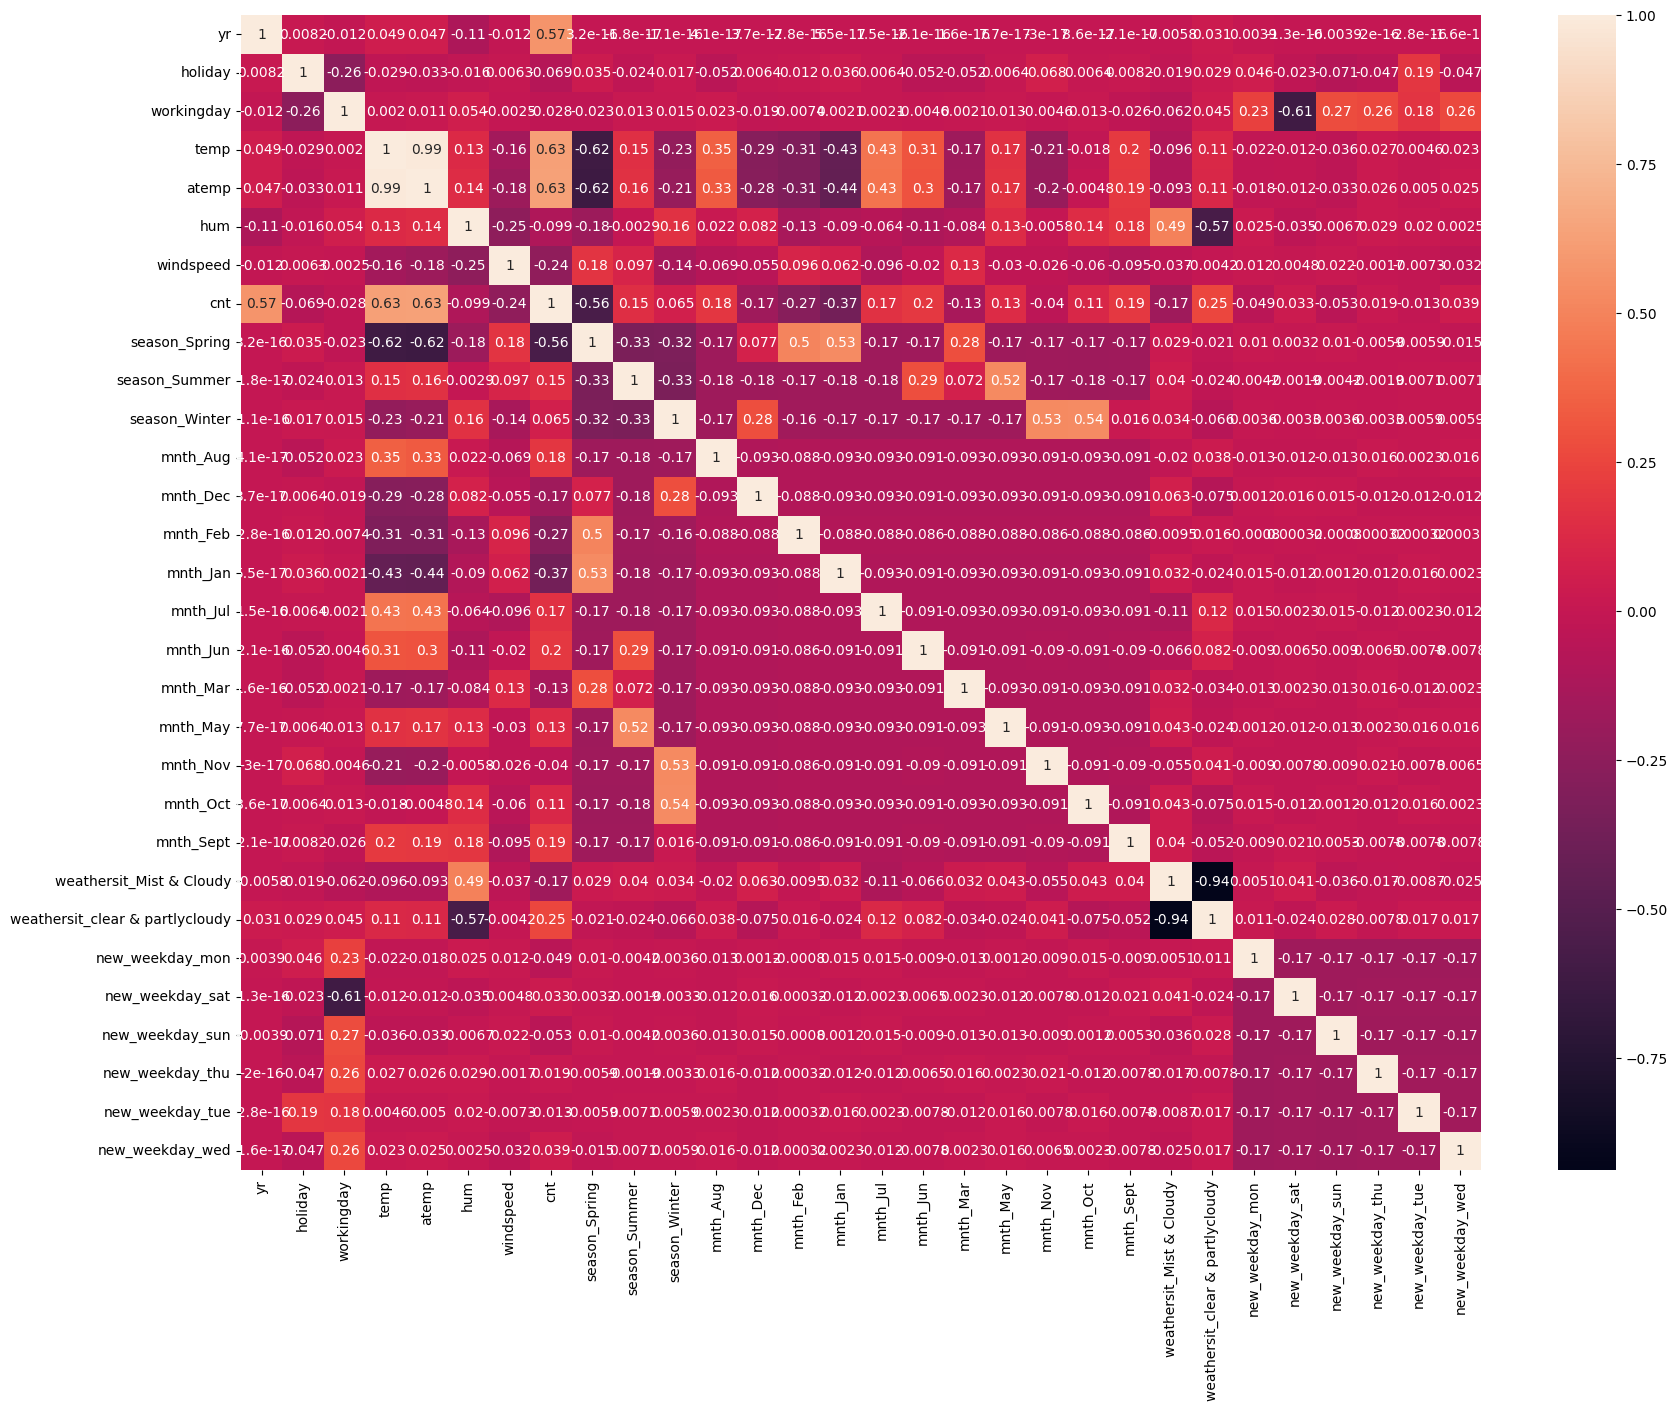

In [27]:
# checking to see correlation are adding dummy variables
plt.figure(figsize = (20, 15))
sns.heatmap(bike.corr(), annot = True)
plt.show()

### Step 5: Model Building

In [28]:
#splitting data into train and test datasets
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state=100)

In [29]:
# printing shape of train, test datasets
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [30]:
# Using normalized scaler
scaler = MinMaxScaler()

In [31]:
# Fitting and transforming the training set
num_vars=['cnt','temp','atemp','hum','windspeed']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weathersit_Mist & Cloudy,weathersit_clear & partlycloudy,new_weekday_mon,new_weekday_sat,new_weekday_sun,new_weekday_thu,new_weekday_tue,new_weekday_wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.343137,0.627451,0.152941,0.137255,0.154902,0.147059,0.135294,0.143137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.475223,0.483958,0.360284,0.344454,0.362166,0.354512,0.342373,0.350557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weathersit_Mist & Cloudy,weathersit_clear & partlycloudy,new_weekday_mon,new_weekday_sat,new_weekday_sun,new_weekday_thu,new_weekday_tue,new_weekday_wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,1,0,0,0,0


In [33]:
# Dividing into X, y for model building
y_train = df_train.pop('cnt')
X_train = df_train

### Step 6: Building a linear model using RFE

In [34]:
# creating Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
# using RFE to select 15 features from model
rfe = RFE(estimator=lm,n_features_to_select=15).fit(X_train, y_train)

In [36]:
# listing the features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sept', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('weathersit_clear & partlycloudy', True, 1),
 ('new_weekday_mon', False, 9),
 ('new_weekday_sat', False, 12),
 ('new_weekday_sun', False, 8),
 ('new_weekday_thu', False, 6),
 ('new_weekday_tue', False, 7),
 ('new_weekday_wed', False, 5)]

In [37]:
# printing columns selected by RFE.
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_Mist & Cloudy',
       'weathersit_clear & partlycloudy'],
      dtype='object')

In [38]:
# printing columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'new_weekday_mon', 'new_weekday_sat',
       'new_weekday_sun', 'new_weekday_thu', 'new_weekday_tue',
       'new_weekday_wed'],
      dtype='object')

In [39]:
# creating new variable and assigning rfe selected columns
X_train_rfe = X_train[rfe_col]

In [40]:
# adding a constant to dataframe
X_train_lr = sm.add_constant(X_train_rfe)

In [41]:
# creating a function to calculate vif
def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['Vif']  = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by="Vif",ascending=False)
    return vif

### Model 1

In [42]:
# running 1st model
lr_1 = sm.OLS(y_train,X_train_lr).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.34e-189
Time:                        12:25:54   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0721      0.047      1.519      0.129      -0.021       0.165
yr                                  0.2303      0.008     28.511      0.000       0.214       0.246
holiday                            -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                                0.4800      0.037     12.977      0.000       0.407       0.553
hum                                -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                          -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_Spring                      -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer                       0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter                       0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec                           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan                           -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul                           -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov                           -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sept                           0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Mist & Cloudy            0.1922      0.025      7.697      0.000       0.143       0.241
weathersit_clear & partlycloudy     0.2481      0.026      9.402      0.000       0.196       0.300
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# calculating VIF score for model 1 features
calculate_vif(X_train_rfe)

,features,Vif
3,hum,26.357917
2,temp,25.118345
14,weathersit_clear & partlycloudy,15.689682
13,weathersit_Mist & Cloudy,9.245392
5,season_Spring,5.750202
4,windspeed,4.665600
7,season_Winter,4.535252
6,season_Summer,3.280590
0,yr,2.096063
11,mnth_Nov,1.891993


In [44]:
X_train_rfe = X_train_rfe.drop('hum', axis = 1)

### Model 2

In [45]:
# running 1st model
X_train_lr = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lr).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.57e-186
Time:                        12:25:55   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0463      0.039     -1.184      0.237      -0.123       0.030
yr                                  0.2343      0.008     28.709      0.000       0.218       0.250
holiday                            -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                                0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                          -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_Spring                      -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer                       0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter                       0.0887      0.018      4.951      0.000       0.053       0.124
mnth_Dec                           -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan                           -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_Jul                           -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov                           -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sept                           0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Mist & Cloudy            0.2114      0.025      8.466      0.000       0.162       0.261
weathersit_clear & partlycloudy     0.2929      0.025     11.908      0.000       0.245       0.341
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# calculating VIF score for model 2 features
calculate_vif(X_train_rfe)

,features,Vif
13,weathersit_clear & partlycloudy,15.683067
2,temp,14.002293
12,weathersit_Mist & Cloudy,8.770910
3,windspeed,4.653345
4,season_Spring,4.404700
6,season_Winter,3.355966
5,season_Summer,2.761421
0,yr,2.076746
10,mnth_Nov,1.871524
8,mnth_Jan,1.735239


In [47]:
X_train_rfe = X_train_rfe.drop('weathersit_clear & partlycloudy', axis = 1)

### Model 3

In [48]:
X_train_lr = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lr).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.08e-160
Time:                        12:25:55   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2198      0.036      6.054      0.000       0.148       0.291
yr                           0.2398      0.009     25.974      0.000       0.222       0.258
holiday                     -0.0806      0.029     -2.734      0.006      -0.138      -0.023
temp                         0.4664      0.041     11.389      0.000       0.386       0.547
windspeed                   -0.1862      0.028     -6.546      0.000      -0.242      -0.130
season_Spring               -0.0609      0.024     -2.505      0.013      -0.109      -0.013
season_Summer                0.0402      0.018      2.294      0.022       0.006       0.075
season_Winter                0.0748      0.020      3.696      0.000       0.035       0.115
mnth_Dec                    -0.0276      0.020     -1.383      0.167      -0.067       0.012
mnth_Jan                    -0.0406      0.021     -1.956      0.051      -0.081       0.000
mnth_Jul                    -0.0534      0.021     -2.549      0.011      -0.095      -0.012
mnth_Nov                    -0.0248      0.022     -1.154      0.249      -0.067       0.017
mnth_Sept                    0.0617      0.019      3.189      0.002       0.024       0.100
weathersit_Mist & Cloudy    -0.0677      0.010     -6.926      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      146.814   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.237
Skew:                          -1.261   Prob(JB):                    9.07e-125
Kurtosis:                       7.530   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# calculating VIF score for model 3 features
calculate_vif(X_train_rfe)

,features,Vif
2,temp,5.168692
3,windspeed,4.599433
4,season_Spring,2.887565
6,season_Winter,2.876730
5,season_Summer,2.228135
0,yr,2.067600
10,mnth_Nov,1.792372
8,mnth_Jan,1.655163
9,mnth_Jul,1.593004
12,weathersit_Mist & Cloudy,1.535903


In [50]:
X_train_rfe = X_train_rfe.drop('mnth_Nov', axis = 1)

### Model 4

In [51]:
X_train_lr = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_lr).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          1.63e-161
Time:                        12:25:55   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2094      0.035      5.952      0.000       0.140       0.279
yr                           0.2397      0.009     25.954      0.000       0.222       0.258
holiday                     -0.0847      0.029     -2.898      0.004      -0.142      -0.027
temp                         0.4784      0.040     12.078      0.000       0.401       0.556
windspeed                   -0.1865      0.028     -6.555      0.000      -0.242      -0.131
season_Spring               -0.0558      0.024     -2.335      0.020      -0.103      -0.009
season_Summer                0.0436      0.017      2.523      0.012       0.010       0.078
season_Winter                0.0691      0.020      3.519      0.000       0.031       0.108
mnth_Dec                    -0.0186      0.018     -1.013      0.312      -0.055       0.017
mnth_Jan                    -0.0376      0.021     -1.825      0.069      -0.078       0.003
mnth_Jul                    -0.0533      0.021     -2.543      0.011      -0.094      -0.012
mnth_Sept                    0.0652      0.019      3.409      0.001       0.028       0.103
weathersit_Mist & Cloudy    -0.0674      0.010     -6.893      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      139.682   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.521
Skew:                          -1.215   Prob(JB):                    1.88e-112
Kurtosis:                       7.279   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# calculating VIF score for model 4 features
calculate_vif(X_train_rfe)

,features,Vif
2,temp,5.139654
3,windspeed,4.557839
4,season_Spring,2.886897
5,season_Summer,2.227267
0,yr,2.066738
6,season_Winter,2.023917
8,mnth_Jan,1.650348
9,mnth_Jul,1.592563
11,weathersit_Mist & Cloudy,1.535851
10,mnth_Sept,1.335283


In [53]:
X_train_rfe = X_train_rfe.drop('mnth_Dec', axis = 1)

### Model 5

In [54]:
X_train_lr = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train,X_train_lr).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          2.01e-162
Time:                        12:25:55   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2010      0.034      5.879      0.000       0.134       0.268
yr                           0.2397      0.009     25.953      0.000       0.222       0.258
holiday                     -0.0839      0.029     -2.869      0.004      -0.141      -0.026
temp                         0.4876      0.039     12.644      0.000       0.412       0.563
windspeed                   -0.1835      0.028     -6.484      0.000      -0.239      -0.128
season_Spring               -0.0549      0.024     -2.297      0.022      -0.102      -0.008
season_Summer                0.0456      0.017      2.654      0.008       0.012       0.079
season_Winter                0.0680      0.020      3.469      0.001       0.029       0.107
mnth_Jan                    -0.0331      0.020     -1.645      0.101      -0.073       0.006
mnth_Jul                    -0.0536      0.021     -2.557      0.011      -0.095      -0.012
mnth_Sept                    0.0667      0.019      3.498      0.001       0.029       0.104
weathersit_Mist & Cloudy    -0.0674      0.010     -6.899      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      137.324   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.840
Skew:                          -1.199   Prob(JB):                    7.86e-109
Kurtosis:                       7.205   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# calculating VIF score for model 5 features
calculate_vif(X_train_rfe)

,features,Vif
2,temp,5.131565
3,windspeed,4.552871
4,season_Spring,2.752243
5,season_Summer,2.223884
0,yr,2.066512
6,season_Winter,1.764363
7,mnth_Jan,1.608416
8,mnth_Jul,1.590579
10,weathersit_Mist & Cloudy,1.533352
9,mnth_Sept,1.334373


In [56]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept',
       'weathersit_Mist & Cloudy'],
      dtype='object')

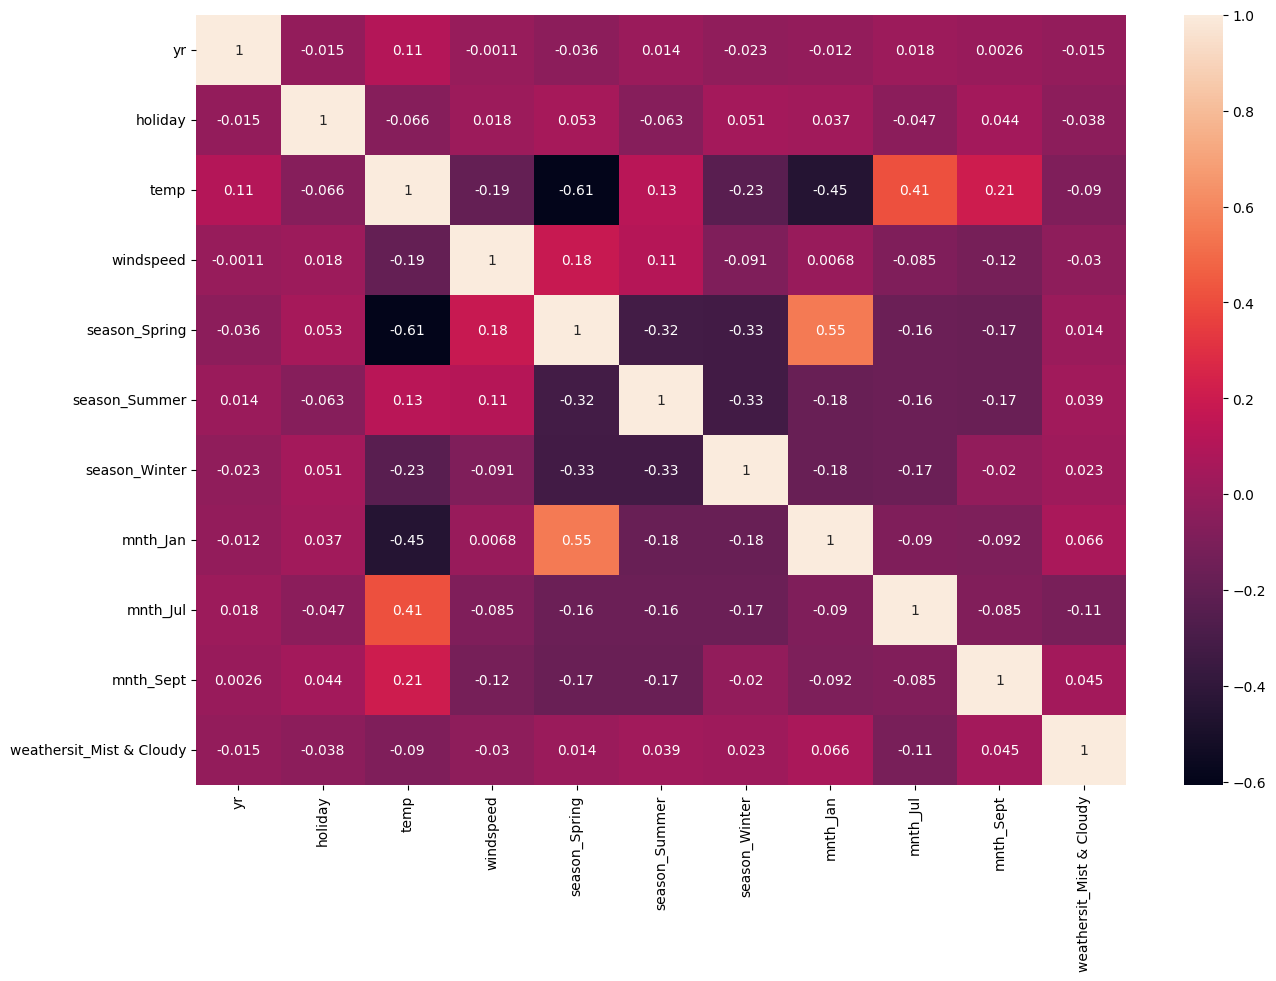

In [57]:
# heatmap for the final model dataframe without const.
plt.figure(figsize=(15,10))
sns.heatmap(X_train_rfe.corr(),annot=True)
plt.show()

### Step 7: Residual Analysis

In [58]:
# predicting the y train values with x train 
y_train_pred = lr_5.predict(X_train_lr)

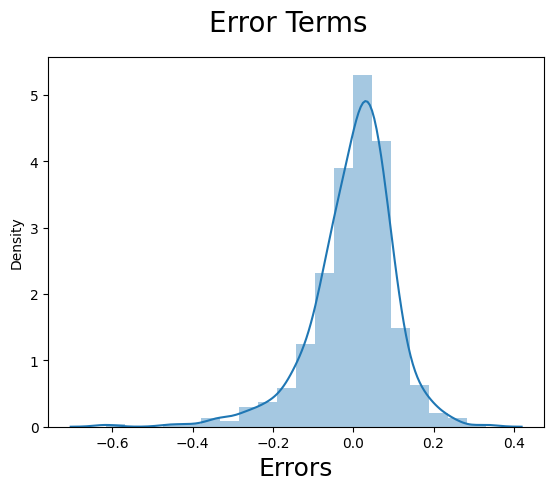

In [59]:
# Plot the histogram of the error terms to check the normality of the errors
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

### Step 8: Prediction on test data

In [60]:
num_vars = ['cnt', 'temp', 'atemp', 'windspeed', 'hum']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weathersit_Mist & Cloudy,weathersit_clear & partlycloudy,new_weekday_mon,new_weekday_sat,new_weekday_sun,new_weekday_thu,new_weekday_tue,new_weekday_wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,1.897202,0.129842,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.319635,0.652968,0.123288,0.155251,0.118721,0.132420,0.155251,0.141553
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.463866,0.051368,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.467403,0.477117,0.329520,0.362974,0.324202,0.339723,0.362974,0.349389
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.724590,0.015460,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,1.550821,0.092963,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,1.863665,0.125381,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,2.225453,0.158650,0.672745,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,3.029478,0.288534,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# Dividing into X,y for testing
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# Creating X_test_rfe with final model columns
X_test_rfe = X_test[X_train_rfe.columns]
X_test_rfe = sm.add_constant(X_test_rfe)

In [63]:
X_test_rfe.head()

,const,yr,holiday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sept,weathersit_Mist & Cloudy
184,1.0,0,1,0.831783,0.056255,0,0,0,0,1,0,1
535,1.0,1,0,0.901354,0.078579,0,1,0,0,0,0,0
299,1.0,0,0,0.511964,0.136540,0,0,1,0,0,0,1
221,1.0,0,0,0.881625,0.138263,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.201802,0,1,0,0,0,0,0


In [64]:
# Predicting 
y_test_pred = lr_5.predict(X_test_rfe)

In [65]:
# checking r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.7930158193026923
r2_score of test dataset 0.7570167099602422


Text(0, 0.5, 'y_pred')

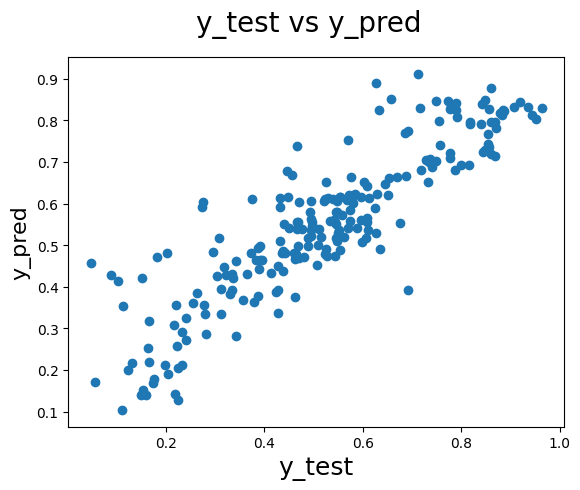

In [66]:
# plotting y_test vs y_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)

In [67]:
# final model params
lr_5.params

const                       0.200957
yr                          0.239669
holiday                    -0.083884
temp                        0.487582
windspeed                  -0.183457
season_Spring              -0.054892
season_Summer               0.045609
season_Winter               0.068005
mnth_Jan                   -0.033143
mnth_Jul                   -0.053569
mnth_Sept                   0.066688
weathersit_Mist & Cloudy   -0.067414
dtype: float64

In [68]:
df = pd.DataFrame({'feature': lr_5.params.index, 'coefficient': lr_5.params.values})
lr_sorted = df.sort_values(by='coefficient', ascending=False)
lr_sorted

,feature,coefficient
3,temp,0.487582
1,yr,0.239669
0,const,0.200957
7,season_Winter,0.068005
10,mnth_Sept,0.066688
6,season_Summer,0.045609
8,mnth_Jan,-0.033143
9,mnth_Jul,-0.053569
5,season_Spring,-0.054892
11,weathersit_Mist & Cloudy,-0.067414


### Final Equation

 $cnt = 0.239669 x yr + (-0.083884) x holiday + 0.487582 x temp + (-0.183457) x windspeed + (-0.054892) x season_Spring + 
        0.045609 x season_Summer + 0.068005 x season_Winter + (-0.033143) x mnth_Jan + (-0.053569) x mnth_Jul + 
        0.066688 x mnth_Sept + (-0.067414) x weathersit_Mist & Cloudy + 0.200957 $

### Significant Variables required to predict the demand for bikes are

##### Positively effected (from highest to lowest)
- temp
- yr
- season_Winter
- mnth_Sept
- season_Summer

###### Reasons:
- Temperature: As temperatures rise, motorbike riding becomes more comfortable and enjoyable. This can entice more people to opt for motorbike sharing for commuting or leisure rides.
- Year: Over time, motorbike sharing services might become more established and convenient. Increased awareness, wider availability, and potentially lower pricing compared to car rentals could lead to a year-on-year rise in demand.
- Season_Winter: This might seem counterintuitive, but in some warmer US regions with mild winters, motorbike sharing could see a slight increase during winter compared to the hottest summer months. This could be due to more manageable weather, While still cooler, winter in these regions might offer more comfortable riding conditions compared to scorching summer heat and also because there is reduction in traffic.
- Month_Sept: September often marks the end of summer in the US. As the intense summer heat subsides, motorbike riding becomes more comfortable, potentially leading to an increase in demand compared to peak summer months.
- Season_Summer: Summer is generally the peak season for motorbike riding in the US due to warmer and drier weather. People are more likely to use motorbike sharing for commuting in pleasant weather conditions.


##### Negatively effected (from highest to lowest)
- windspeed
- holiday
- weathersit_Mist & Cloudy
- season_Spring	
- mnth_Jul	
- mnth_Jan

#### Reasons:
- Windspeed: Strong winds, especially headwinds, can make motorbike riding more challenging and potentially dangerous. This can deter riders from using a shared motorbike for commuting or recreation.
- Holiday: Holidays are often times for travel and family gatherings. People might opt for private vehicles or public transportation for holiday travel, reducing the need for motorbike sharing.
- Mist & Cloudy Weather: Low visibility due to mist or persistent cloud cover can significantly impact a rider's ability to see clearly. This can be especially risky on motorbikes, leading to a decrease in demand during such weather conditions.
- Season_Spring: Spring can be a season with unpredictable weather, including rain showers and strong winds. For casual riders who might not have proper gear for all weather conditions, this might make them hesitant to use a shared motorbike.
- Month_Jul (July): Even though July is summer, some regions in the US experience excessively hot weather. This can be uncomfortable or even dangerous for motorbike riders, leading to a decrease in demand.
- Month_Jan (January): The primary reason for a decrease in January is likely the cold weather. Motorbikes offer less protection from the elements compared to cars. In regions with freezing temperatures or snow, motorbike sharing might not be a viable option.